In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import re, nltk
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')

warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/abel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/abel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# LOAD THE TWITTER US AIRLINES DATASET

tweets = pd.read_csv("Tweets.csv")
print('There are', len(tweets), 'Tweets in the dataset.')

# Take a look at the column names.
print("Columns: ", tweets.columns)

There are 14640 Tweets in the dataset.
Columns:  Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [3]:
## Let's take a look at what is in the data. 
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Make a copy of original dataset for checking missing values

tweets_copy = tweets.copy()

# Shows whether there are null values in each feature. 
print(tweets_copy.isnull().any())

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool


In [5]:
# Shows number of null values in each feature.
print(tweets_copy.isnull().sum())

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


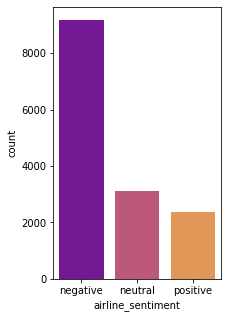

In [6]:
# Observation on the numbers

plt.figure(figsize=(3,5))
sns.countplot(tweets['airline_sentiment'], order =tweets.airline_sentiment.value_counts().index,palette= 'plasma')
plt.show()

Text(0.5, 1.0, 'Number of tweets for every Airline with sentiment distribution')

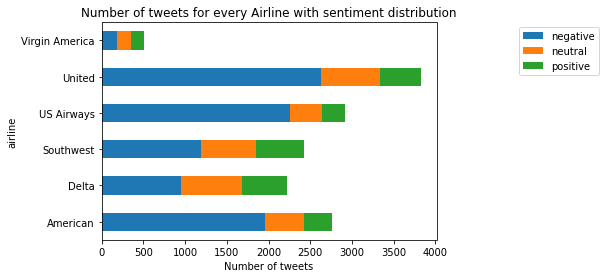

In [7]:
types = tweets.groupby("airline")['airline_sentiment'].value_counts(normalize=False).sort_index()
types.unstack().plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel("Number of tweets")
plt.title("Number of tweets for every Airline with sentiment distribution")

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


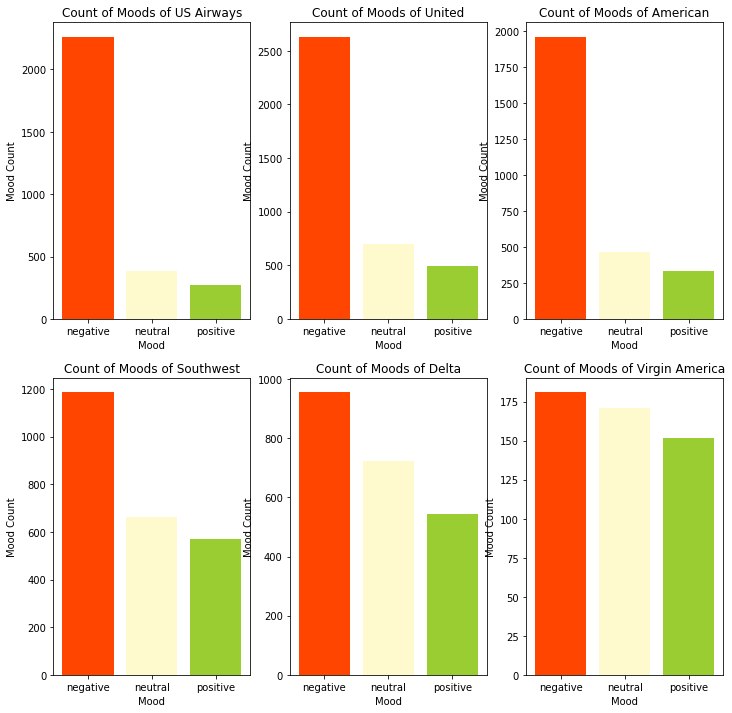

In [8]:
print("Total number of tweets for each airline \n ",tweets.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=tweets[tweets['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['orangered', 'lemonchiffon', 'yellowgreen'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

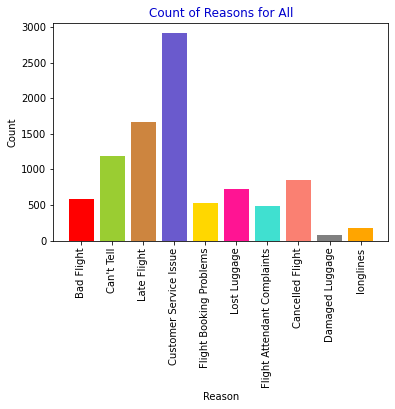

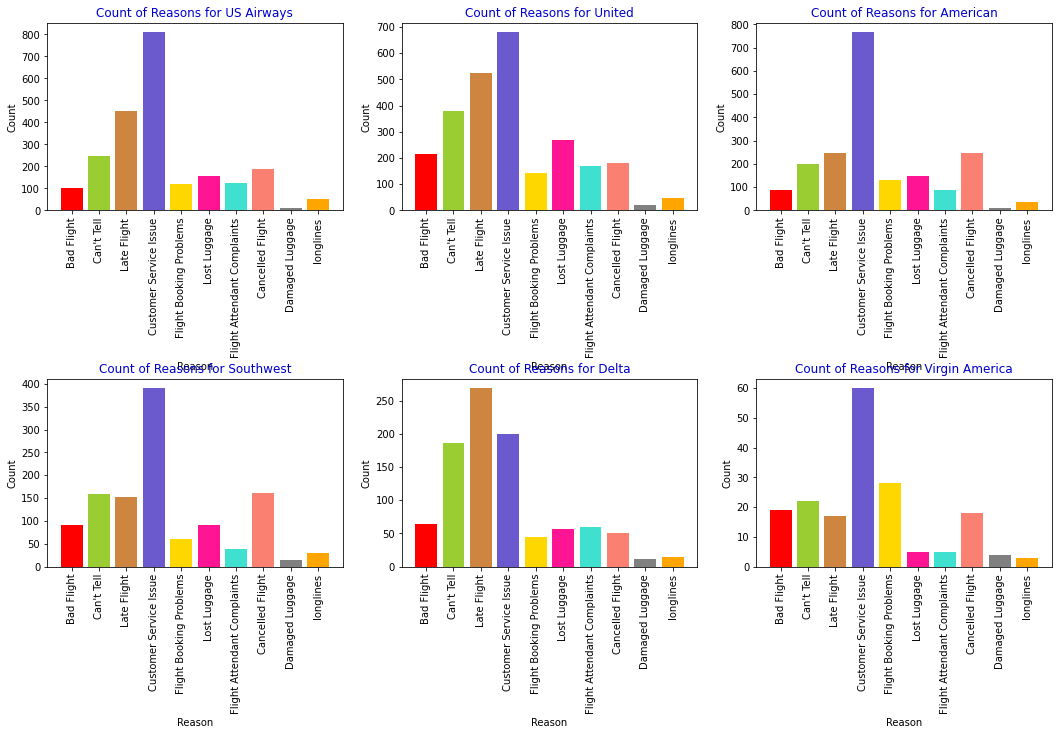

In [9]:
#get the number of negative reasons
tweets['negativereason'].nunique()
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
NR_Count=dict(tweets['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=tweets
    else:
        a=tweets[tweets['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(tweets['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame


def plot_reason(Airline):
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellowgreen','peru','slateblue','gold','deeppink','turquoise','salmon','grey','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline, color = 'mediumblue')
    
plot_reason('All')
plt.figure(2,figsize=(18, 10))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [10]:
print(tweets.airline_sentiment.unique())

['neutral' 'positive' 'negative']


In [11]:
## Let's create a slice of the dataframe that contains only the columns we need. 
tweet_subset = tweets[['text', 'airline_sentiment']]
print(len(tweet_subset))


14640


In [12]:
tweet_subset['target'] = tweet_subset['airline_sentiment']

In [13]:
# Unique values of sentiment
tweet_subset['target'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [14]:
## Now, let's check if the classes are balanced or not

print(len(tweet_subset.loc[tweet_subset['target'] == 'negative']), len(tweet_subset.loc[tweet_subset['target'] == 'neutral']), len(tweet_subset.loc[tweet_subset['target'] == 'positive']))
## after printing, we see that there is some imbalance in the data. 
## one way to handle this is to undersample the majority class. 

9178 3099 2363


In [15]:
## First, I separate the two classes into two dataframes. 
tweet_negative = tweet_subset.loc[tweet_subset['target'] == 'negative']
tweet_neutral = tweet_subset.loc[tweet_subset['target'] == 'neutral']
tweet_positive = tweet_subset.loc[tweet_subset['target'] == 'positive']

print(len(tweet_positive), len(tweet_neutral),len(tweet_negative))
tweet_negativesample = tweet_negative.sample(n=2363)  # pay attention; the sample method works in a random fashion. If you want repeatable results, you need to set a random seed. 
tweet_neutralsample = tweet_neutral.sample(n=2363)
print(len(tweet_negativesample), len(tweet_neutralsample),len(tweet_positive))

tweet_negativeandneutral = tweet_negativesample.append(tweet_neutralsample) # and we append them together to have a balanced dataframe
tweet_subsetmerge = tweet_negativeandneutral.append(tweet_positive)
len(tweet_subsetmerge)

2363 3099 9178
2363 2363 2363


7089

In [16]:
# Preprocessing Text feature

def clean_text(txt):
    
    txt = txt.lower()
    def remove_stopwords(txt):
        return [t for t in txt if t not in stop]
    #txt = re.sub(r"(?<=\w)nt", "not",txt) #change don't to do not can't to cannot 
    txt = re.sub(r"(@\S+)", "", txt)  # remove hashtags
    txt = re.sub(r'\W', ' ', str(txt)) # remove all special characters including apastrophie 
    txt = txt.translate(str.maketrans('', '', string.punctuation)) # remove punctuations 
    txt = re.sub(r'\s+[a-zA-Z]\s+', ' ', txt)   # remove all single characters (it's -> it s then we need to remove s)
    txt = re.sub(r'\s+', ' ', txt, flags=re.I) # Substituting multiple spaces with single space
    txt = re.sub(r"(http\S+|http)", "", txt) # remove links 
#    txt = ' '.join([PorterStemmer().stem(word=word) for word in txt.split(" ") if word not in stop_words ]) # stem & remove stop words
    txt = ''.join([i for i in txt if not i.isdigit()]).strip() # remove digits ()
    return txt

tweet_subsetmerge['text_clean'] = tweet_subsetmerge['text'].apply(clean_text)
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): 
    return re_tok.sub(r' \1 ', s).split()

tweet_subsetmerge['tokenized'] = tweet_subsetmerge['text_clean'].apply(lambda row: tokenize(row))
stop = set(stopwords.words('english'))
stop.update(['amp', 'rt', 'cc'])
stop = stop - set(['no', 'not'])

def remove_stopwords(row):
    return [t for t in row if t not in stop]
tweet_subsetmerge['tokenized'] = tweet_subsetmerge['tokenized'].apply(lambda row: remove_stopwords(row))

tweet_subsetmerge[['text', 'tokenized']].head()

,text,tokenized
2226,@united I sent a PM over two weeks ago and hav...,"[sent, pm, two, weeks, ago, heard, nothing, ho..."
3437,@united really hoping to get some help here. ...,"[really, hoping, get, help, th, attempt, get, ..."
7976,@JetBlue looks like their inflatable car seats...,"[looks, like, inflatable, car, seats, got, lef..."
9040,"@USAirways ...2 hours on the plane, they at le...","[hours, plane, least, got, us, direct, flight,..."
7783,@JetBlue I would like to send an email to Lost...,"[would, like, send, email, lost, found, jetblu..."


In [17]:
# to check negative content
tweet_subsetmerge.loc[tweet_subsetmerge['target'] == 'negative'].tokenized

2226     [sent, pm, two, weeks, ago, heard, nothing, ho...
3437     [really, hoping, get, help, th, attempt, get, ...
7976     [looks, like, inflatable, car, seats, got, lef...
9040     [hours, plane, least, got, us, direct, flight,...
7783     [would, like, send, email, lost, found, jetblu...
                               ...                        
11942    [spent, choppiest, feed, whiplash, ever, ameri...
2353     [charge, making, decisions, cancelled, flightl...
13486    [last, trip, poor, customer, service, trips, r...
11814    [tips, getting, hotel, airline, get, us, even,...
10770    [flight, carryon, missing, stollen, plane, lef...
Name: tokenized, Length: 2363, dtype: object

In [18]:
from sklearn.model_selection import train_test_split

# let's make sure all elements in text are strings.
corpus_text = tweet_subsetmerge.tokenized
corpus_text = [str (item) for item in corpus_text]
y = tweet_subsetmerge.target  

# Split the data.
X_train, X_test, y_train, y_test = train_test_split(corpus_text, y, test_size=0.2)

### IMPORTANT: Take a look at the input data types. 
print(type(corpus_text), type(y))

<class 'list'> <class 'pandas.core.series.Series'>


In [19]:
# Look what is in the X_train (or X_test)
print(len(X_train))
X_train[0:5]
## So, this is a list of raw strings. 

5671


["['oh', 'get', 'better', 'apparently', 'making', 'us', 'wait', 'gate', 'psych', 'need', 'de', 'ice', 'coming', 'gate']",
 "['thank', 'prompt', 'response', 'email', 'late', 'flightr', 'today']",
 "['ridiculous', 'refunded', 'whenever', 'get', 'final', 'destination', 'not']",
 "['no', 'general', 'announcement']",
 "['done', 'done', 'best', 'airline', 'around', 'hands']"]

In [20]:
y_train[0:5]

13945    negative
6004     positive
1703     negative
9256      neutral
37       positive
Name: target, dtype: object

In [21]:
## Let's vectorize the text

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
v_sparse_posts_training = vect.fit_transform(X_train)
print(v_sparse_posts_training.shape)

## the code above vectorizes only the training set. Later, we will need the test set to be vectorized (using the same vectorizer) so, I do it here as well. 
v_sparse_posts_test = vect.transform(X_test) ## Pay attention: we are using .transform() here, not .fit_transform() because we need to use the vectorizer that we trained above. 
print(v_sparse_posts_test.shape)

## Look at the dimensions of the two matrices. What is important to understand is that the number of columns (i.e., the features or the vocabulary) is the same for both training andtesting. 
## This means the vectors have the same dimensionality. 
## Just to see what will happen, try to use .fit_transform() instead of .transform() while vectorizing the test set. You will see that the number of columns in the test matrix will decrease. Then, do not forget to fix the code again. 


(5671, 7304)
(1418, 7304)


In [22]:
## Train a Naive Bayes classifier.
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB() 
clf.fit(v_sparse_posts_training, y_train) ## Simply give the vectorized training set and the labels as inputs, and fit the classifier.


MultinomialNB()

In [23]:
## to test the classifier:
predicted = clf.predict(v_sparse_posts_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

    negative       0.65      0.80      0.72       452
     neutral       0.73      0.52      0.61       477
    positive       0.76      0.81      0.79       489

    accuracy                           0.71      1418
   macro avg       0.71      0.71      0.71      1418
weighted avg       0.72      0.71      0.71      1418



In [24]:
## finally, use the classifier to make predictions on unseen data. (also for sense-making)
## Remember, all unseen data must be passed through the pipeline that you used while training the classifier. 

corpus_unseen = ['happy flight', 'flight delayed for 10 hours it is not acceptable','i visit the airline website']
v_sparse_posts_unseen = vect.transform(corpus_unseen)  ## Attention: we are using the same vectorizer that we created earlier! 
clf.predict(v_sparse_posts_unseen)

array(['positive', 'negative', 'positive'], dtype='<U8')

In [25]:
type(y_test)

pandas.core.series.Series

# **--------part5 clustering algorithm ---------**
